In [24]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Conv1D, Flatten
from tensorflow.keras.layers import AveragePooling1D, MaxPooling1D, GlobalMaxPool1D, GlobalAvgPool1D

import matplotlib.pyplot as plt

In [16]:

news1 = pd.read_csv('./djia_news/djia_news copy.csv')
news2 = pd.read_csv('./nasdaq/nasdaq.csv')

combined_news = news1.append(news2)
combined_news = combined_news[['Label', 'Headline']]
original_news = combined_news
len(original_news)

15562

In [17]:
version_1 = original_news
version_2 = original_news
version_3 = original_news

version_1 = version_1.replace([0,1,2], [1,0,0])
version_2  = version_2.replace([0,1,2], [0,1,0])
version_3  = version_3.replace([0,1,2], [0,0,1])

In [18]:
train_limit = round(len(version_1) * 0.75)

train_data = version_1[0:train_limit]
test_data = version_1[train_limit:]

In [19]:
train_headlines = train_data['Headline']
train_labels = train_data["Label"]

test_headlines = test_data['Headline']
test_labels = test_data['Label']


In [20]:
vocab_size = 10000
emb_size = 50
max_length = 20000
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<oov>'

In [21]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(train_headlines)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_headlines)
train_padded = pad_sequences(train_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_headlines)
test_padded = pad_sequences(test_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

In [25]:
model_1 = Sequential()
model_1.add(Embedding(vocab_size, emb_size, input_length = max_length))
model_1.add(LSTM(16, return_sequences = True))
model_1.add(Conv1D(32, 5))
model_1.add(Conv1D(64, 7))
model_1.add(AveragePooling1D(7))
model_1.add(Bidirectional(LSTM(32)))
model_1.add(Flatten())
model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dense(32))
model_1.add(Dense(16))
model_1.add(Dense(1, activation = 'sigmoid'))

model_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# model_1.summary()

In [26]:

with tf.device('/device:GPU:0'):
    num_epochs = 20
    history_1 = model_1.fit(
        train_padded,
        train_labels,
        epochs = num_epochs,
        validation_data = (test_padded, test_labels),
    )

Train on 11672 samples, validate on 3890 samples
Epoch 1/20
11672/11672 [==============================] - 284s 24ms/sample - loss: 0.6395 - accuracy: 0.6355 - val_loss: 0.6414 - val_accuracy: 0.6704
Epoch 2/20
11672/11672 [==============================] - 281s 24ms/sample - loss: 0.4879 - accuracy: 0.7618 - val_loss: 0.7488 - val_accuracy: 0.6373
Epoch 3/20
11672/11672 [==============================] - 281s 24ms/sample - loss: 0.3614 - accuracy: 0.8388 - val_loss: 0.8482 - val_accuracy: 0.6067
Epoch 4/20
11672/11672 [==============================] - 280s 24ms/sample - loss: 0.2522 - accuracy: 0.8915 - val_loss: 1.3077 - val_accuracy: 0.5612
Epoch 5/20
11672/11672 [==============================] - 281s 24ms/sample - loss: 0.1650 - accuracy: 0.9216 - val_loss: 1.5104 - val_accuracy: 0.5548
Epoch 6/20
11672/11672 [==============================] - 281s 24ms/sample - loss: 0.1268 - accuracy: 0.9334 - val_loss: 2.1533 - val_accuracy: 0.5763
Epoch 7/20
11672/11672 [=====================

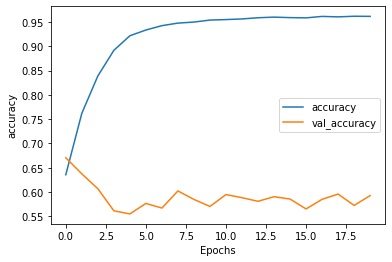

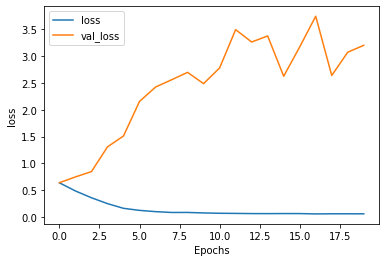

In [27]:
def plot_metrics(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_' + metric])
    plt.show()
plot_metrics(history_1, 'accuracy')
plot_metrics(history_1, 'loss')

In [ ]:
train_limit = round(len(version_2) * 0.75)

train_data = version_2[0:train_limit]
test_data = version_2[train_limit:]

In [ ]:
train_headlines = train_data['Headline']
train_labels = train_data["Label"]

test_headlines = test_data['Headline']
test_labels = test_data['Label']

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(train_headlines)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_headlines)
train_padded = pad_sequences(train_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_headlines)
test_padded = pad_sequences(test_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

In [ ]:
model_2 = Sequential()
model_2.add(Embedding(vocab_size, emb_size, input_length = max_length))
model_2.add(Bidirectional(LSTM(32)))
model_2.add(Dense(32, activation = 'relu'))
model_2.add(Dense(1, activation = 'sigmoid'))

model_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# model_1.summary()

In [ ]:
num_epochs = 5
history_2 = model_2.fit(
    train_padded,
    train_labels,
    epochs = num_epochs,
    validation_data = (test_padded, test_labels),
)

In [ ]:
plot_metrics(history_2, 'accuracy')
plot_metrics(history_2, 'loss')

In [ ]:
train_limit = round(len(version_3) * 0.75)

train_data = version_3[0:train_limit]
test_data = version_3[train_limit:]

In [ ]:
train_headlines = train_data['Headline']
train_labels = train_data["Label"]

test_headlines = test_data['Headline']
test_labels = test_data['Label']

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(train_headlines)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_headlines)
train_padded = pad_sequences(train_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_headlines)
test_padded = pad_sequences(test_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

In [ ]:
model_3 = Sequential()
model_3.add(Embedding(vocab_size, emb_size, input_length = max_length))
model_3.add(Bidirectional(LSTM(32))
model_3.add(Dense(32, activation = 'relu'))
model_3.add(Dense(1, activation = 'sigmoid'))

model_3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# model_1.summary()

In [ ]:
num_epochs = 5
history_3 = model_2.fit(
    train_padded,
    train_labels,
    epochs = num_epochs,
    validation_data = (test_padded, test_labels),
    verbose = 1
)

In [ ]:
plot_metrics(history_3, 'accuracy')
plot_metrics(history_3, 'loss')

In [ ]:
import pickle
from keras_pickle_wrapper import KerasPickleWrapper

pickled_wrapped = KerasPickleWrapper(model_1)
filename = './model_1_weight.pkl'
pickle.dump(pickled_wrapped, open(filename, 'wb'))